# Import Library

In [1]:
# !pip uninstall numpy
# !pip uninstall tensorflow
# !pip install numpy==1.25.2
# !pip install tensorflow==2.15.0

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [3]:
pip install swifter

In [4]:
!pip install gensim

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Loading Dataset

In [6]:
tkpd_review_df = pd.read_csv('ulasan_aplikasi_tokopedia.csv')
tkpd_review_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c4d64638-5f79-470d-a6d7-3510c5b44648,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi Payah.. Baru Pertama Pakai Tokopedia ...,2,46,3.305.0,2025-04-07 02:55:19,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-07 03:27:03,3.305.0
1,9faf326c-e252-468c-b283-19ea0bac9f3c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Setelah di beli tiktok, tokopedia jadi ancur, ...",1,52,3.305.0,2025-04-04 18:13:01,"Halo Toppers, terima kasih atas rating yang ka...",2025-04-04 18:47:03,3.305.0
2,535c5471-1574-4053-a7a4-79ab27ae6f57,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Salah satu aplikasi yang untuk hobi barangnya ...,4,12,3.305.0,2025-04-09 05:41:59,"Toppers, terima kasih atas rating yang kamu be...",2025-04-09 06:07:01,3.305.0
3,c8ab50e4-aca7-4498-9ccd-07d7fc5481cf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"bintang satu gan, hati2 transaksi di aplikasi ...",1,11,3.305.0,2025-04-11 03:01:49,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-11 03:27:05,3.305.0
4,98a606a6-be4f-4d28-bfe6-0f68cd27c445,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kok otomatis bisa menyalurkan uang ke penjual ...,1,59,3.305.0,2025-03-29 16:34:08,"Halo Toppers, terima kasih atas rating yang ka...",2025-03-29 17:07:02,3.305.0


In [7]:
tkpd_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184500 entries, 0 to 184499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              184500 non-null  object
 1   userName              184500 non-null  object
 2   userImage             184500 non-null  object
 3   content               184500 non-null  object
 4   score                 184500 non-null  int64 
 5   thumbsUpCount         184500 non-null  int64 
 6   reviewCreatedVersion  128466 non-null  object
 7   at                    184500 non-null  object
 8   replyContent          90743 non-null   object
 9   repliedAt             90743 non-null   object
 10  appVersion            128466 non-null  object
dtypes: int64(2), object(9)
memory usage: 15.5+ MB


In [8]:
duplicate_data = tkpd_review_df.duplicated().sum()
missing_value = tkpd_review_df.isnull().sum()

print(f'Jumlah data duplikat: {duplicate_data}')
print(f'Jumlah missing value:\n{missing_value}')

Jumlah data duplikat: 0
Jumlah missing value:
reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    56034
at                          0
replyContent            93757
repliedAt               93757
appVersion              56034
dtype: int64


# Cleaning Data

In [9]:
clean_df = tkpd_review_df.dropna()
clean_df = clean_df.drop_duplicates()

In [10]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69424 entries, 0 to 184491
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              69424 non-null  object
 1   userName              69424 non-null  object
 2   userImage             69424 non-null  object
 3   content               69424 non-null  object
 4   score                 69424 non-null  int64 
 5   thumbsUpCount         69424 non-null  int64 
 6   reviewCreatedVersion  69424 non-null  object
 7   at                    69424 non-null  object
 8   replyContent          69424 non-null  object
 9   repliedAt             69424 non-null  object
 10  appVersion            69424 non-null  object
dtypes: int64(2), object(9)
memory usage: 6.4+ MB


In [11]:
clean_df_full = clean_df.copy()

clean_df = clean_df.head(30000)

In [12]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 59136
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              30000 non-null  object
 1   userName              30000 non-null  object
 2   userImage             30000 non-null  object
 3   content               30000 non-null  object
 4   score                 30000 non-null  int64 
 5   thumbsUpCount         30000 non-null  int64 
 6   reviewCreatedVersion  30000 non-null  object
 7   at                    30000 non-null  object
 8   replyContent          30000 non-null  object
 9   repliedAt             30000 non-null  object
 10  appVersion            30000 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.7+ MB


# Preprocessing Text


In [13]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in text]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [14]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [15]:
import swifter

# Membersihkan teks
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil
clean_df['text_casefolding'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata kata slang menjadi kata kata standar
clean_df['text_slangwords'] = clean_df['text_casefolding'].apply(fix_slangwords)

# Memecah teks menjadi token
clean_df['text_tokenizing'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus stopwords
clean_df['text_stopwords'] = clean_df['text_tokenizing'].apply(filteringText)

# # Stemming
# clean_df['text_stemming'] = clean_df['text_stopwords'].swifter.apply(stemmingText)

# Menggabungkan token token menjadi kalimat
clean_df['text_akhir'] = clean_df['text_stopwords'].apply(toSentence)

In [16]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefolding,text_slangwords,text_tokenizing,text_stopwords,text_akhir
0,c4d64638-5f79-470d-a6d7-3510c5b44648,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi Payah.. Baru Pertama Pakai Tokopedia ...,2,46,3.305.0,2025-04-07 02:55:19,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-07 03:27:03,3.305.0,Aplikasi Payah Baru Pertama Pakai Tokopedia te...,aplikasi payah baru pertama pakai tokopedia te...,aplikasi payah baru pertama pakai tokopedia te...,"[aplikasi, payah, baru, pertama, pakai, tokope...","[aplikasi, payah, pakai, tokopedia, pengiriman...",aplikasi payah pakai tokopedia pengiriman co t...
1,9faf326c-e252-468c-b283-19ea0bac9f3c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Setelah di beli tiktok, tokopedia jadi ancur, ...",1,52,3.305.0,2025-04-04 18:13:01,"Halo Toppers, terima kasih atas rating yang ka...",2025-04-04 18:47:03,3.305.0,Setelah di beli tiktok tokopedia jadi ancur pa...,setelah di beli tiktok tokopedia jadi ancur pa...,setelah di beli tiktok tokopedia jadi hancur p...,"[setelah, di, beli, tiktok, tokopedia, jadi, h...","[beli, tiktok, tokopedia, hancur, pantes, toko...",beli tiktok tokopedia hancur pantes toko sepi ...
2,535c5471-1574-4053-a7a4-79ab27ae6f57,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Salah satu aplikasi yang untuk hobi barangnya ...,4,12,3.305.0,2025-04-09 05:41:59,"Toppers, terima kasih atas rating yang kamu be...",2025-04-09 06:07:01,3.305.0,Salah satu aplikasi yang untuk hobi barangnya ...,salah satu aplikasi yang untuk hobi barangnya ...,salah satu aplikasi yang untuk hobi barangnya ...,"[salah, satu, aplikasi, yang, untuk, hobi, bar...","[salah, aplikasi, hobi, barangnya, lengkap, ba...",salah aplikasi hobi barangnya lengkap banget m...
3,c8ab50e4-aca7-4498-9ccd-07d7fc5481cf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"bintang satu gan, hati2 transaksi di aplikasi ...",1,11,3.305.0,2025-04-11 03:01:49,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-11 03:27:05,3.305.0,bintang satu gan hati transaksi di aplikasi in...,bintang satu gan hati transaksi di aplikasi in...,bintang satu juragan hati transaksi di aplikas...,"[bintang, satu, juragan, hati, transaksi, di, ...","[bintang, juragan, hati, transaksi, aplikasi, ...",bintang juragan hati transaksi aplikasi virtua...
4,98a606a6-be4f-4d28-bfe6-0f68cd27c445,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kok otomatis bisa menyalurkan uang ke penjual ...,1,59,3.305.0,2025-03-29 16:34:08,"Halo Toppers, terima kasih atas rating yang ka...",2025-03-29 17:07:02,3.305.0,Kok otomatis bisa menyalurkan uang ke penjual ...,kok otomatis bisa menyalurkan uang ke penjual ...,kok otomatis bisa menyalurkan uang ke penjual ...,"[kok, otomatis, bisa, menyalurkan, uang, ke, p...","[otomatis, menyalurkan, uang, penjual, dasar, ...",otomatis menyalurkan uang penjual dasar aplika...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59126,efd2002b-3f60-40b3-8c6b-3df26d01aa94,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Payah. Voucher traktiran pengguna baru gak ada...,1,2,3.142,2021-09-27 12:19:17,"Hai Kak Vadjry, mohon maaf atas ketidaknyamana...",2021-09-27 12:54:38,3.142,Payah Voucher traktiran pengguna baru gak ada ...,payah voucher traktiran pengguna baru gak ada ...,payah voucher traktiran pengguna baru gak ada ...,"[payah, voucher, traktiran, pengguna, baru, ga...","[payah, voucher, traktiran, pengguna, dipakai,...",payah voucher traktiran pengguna dipakai gagal...
59127,cccc931f-c3a5-43d8-b910-44631802f0f6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Parah.. sudah cukup.. tokped makin banyak aj p...,1,11,3.166,2022-03-23 04:32:42,"Hai Toppers, maaf ya atas ketidaknyamanannya. ...",2022-03-23 04:56:16,3.166,Parah sudah cukup tokped

# Pelabelan

In [17]:
import csv
import requests
from io import StringIO

# Positive lexicon data
lexicon_positive = dict()
response = requests.get("https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv")

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch data")

In [18]:
# Negative lexicon data
lexicon_negative = dict()
response = requests.get("https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv")

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch data")

In [19]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
    for word in text:
        if word in lexicon_negative:
            score += lexicon_negative[word]

    # Menentukan polaritas berdasarkan skor
    if score > 0.5:
        polarity = 'positive'
    elif score < -0.5:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity


In [20]:
results = clean_df['text_stopwords'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    14671
positive    13587
neutral      1742
Name: count, dtype: int64


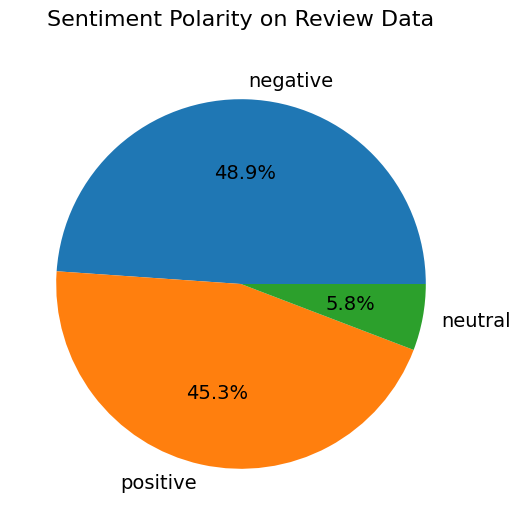

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)
explode = (0, 0, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title("Sentiment Polarity on Review Data", fontsize=16, pad=20)
plt.show()

In [22]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopwords']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [23]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopwords']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

In [24]:
# list_words = ''

# for tweet in clean_df['text_stopwords']:
#     for word in tweet:
#       list_words += ' ' + (word)

# wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.set_title("Word Cloud of Tweets Data", fontsize=18)
# ax.grid(False)
# ax.imshow((wordcloud))
# fig.tight_layout(pad=0)
# ax.axis('off')
# plt.show()

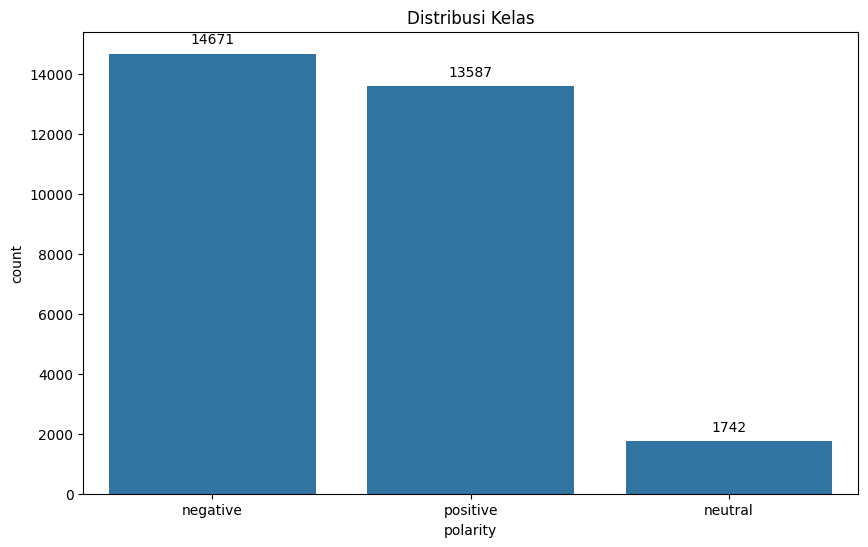

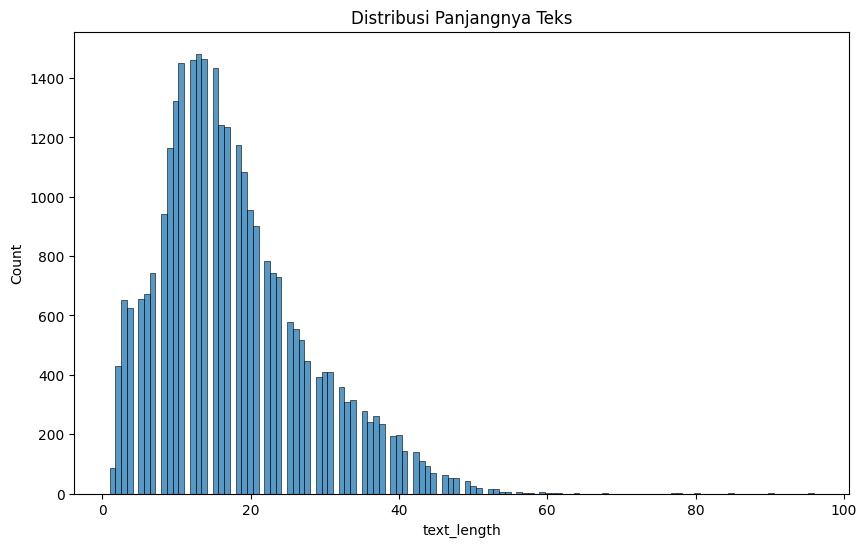

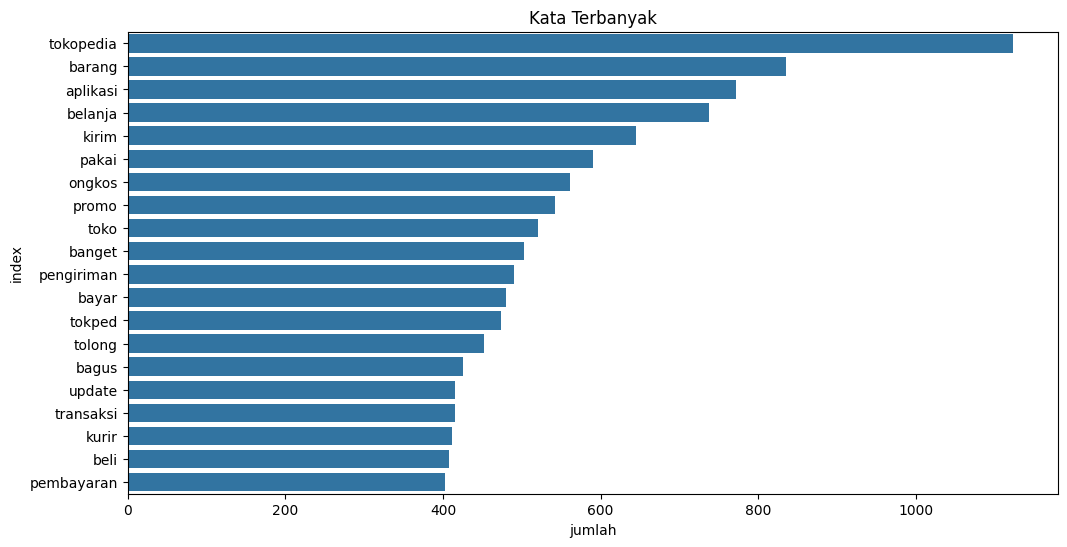

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Visualisasi
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Distribusi Kelas')
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Visualiasi distribusi panjang teks
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Distribusi Panjangnya Teks')
plt.show()

# Visualisasi kata terbanyak
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Kata Terbanyak')
plt.show()


# Data Splitting

In [26]:
X = clean_df['text_akhir']
y = clean_df['polarity']

## Ekstraksi TF-IDF

In [27]:
# Ektraksi firut dengan TF-IDF
tfidf = TfidfVectorizer(max_features=8000, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

In [28]:
# Konversi hasil ektraksi fitur menjadi df
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df

,aamiin,abal,academy,acara,accord,account,adain,adakan,adik,adil,...,wkwkwk,worth,wow,xiaomi,xjam,yaaa,yah,yes,yng,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.169792,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.267586,0.0,0.0,0.0,0.0,0.0,0.200788,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [29]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

X_dense = X_tfidf.toarray()

# SMOTE hanya bisa jalan di array
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_dense, y)

print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))

# Konversi hasilnya untuk analisis dan modeling
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.Series(y_resampled, name='Target')


Distribusi kelas setelah SMOTE: Counter({'negative': 14671, 'positive': 14671, 'neutral': 14671})


In [30]:
from sklearn.model_selection import train_test_split

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Ekstraksi Word2Vec

In [31]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [32]:
word2vec = Word2Vec(sentences=clean_df['text_stopwords'], vector_size=200, window=5, min_count=5, sg=1)

In [33]:
def get_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X_w2v = np.array([get_sentence_vector(tokens, word2vec) for tokens in clean_df['text_stopwords']])

# Check hasil vektor
print('Shape of Word2Vec matrix',X_w2v)

Shape of Word2Vec matrix [[-0.12225593  0.04037441 -0.00525986 ... -0.16513821  0.03591408
  -0.08437504]
 [-0.02486558  0.00173711  0.02309716 ... -0.15481748  0.04133266
   0.01067437]
 [-0.11064074  0.05169644  0.05086882 ... -0.18983883 -0.0394097
  -0.07442673]
 ...
 [-0.05952828 -0.00470977  0.1166264  ... -0.17904909 -0.07599493
  -0.13846275]
 [ 0.00090849  0.04516954  0.06837109 ... -0.16506514 -0.05998279
  -0.08174803]
 [-0.09762313 -0.06548047  0.01177657 ... -0.27410346  0.01829334
  -0.01616073]]


In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

# Melakukan SMOTE pada hasil vektor Word2Vec
smote = SMOTE(random_state=42)
X_resampled_w2v, y_resampled_w2v = smote.fit_resample(X_w2v, y)

print("Distribusi kelas setelah SMOTE:", Counter(y_resampled_w2v))

# Pastikan konversi ke DataFrame benar
X_resampled_w2v = pd.DataFrame(X_resampled_w2v)
y_resampled_w2v = pd.Series(y_resampled_w2v, name='Target')

# Split data
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    X_resampled_w2v, y_resampled_w2v, test_size=0.3, random_state=42)


Distribusi kelas setelah SMOTE: Counter({'negative': 14671, 'positive': 14671, 'neutral': 14671})


# Pemodelan

## Random Forest

### TF-IDF

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Skema 1 : TF-IDF 80/20

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9998011928429423
Random Forest - accuracy_test: 0.8599341133704419


### Word2Vec

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Skema 2 : Random Forest Word2Vec 70/30

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train_w2v, y_train_w2v)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf_w2v = random_forest.predict(X_train_w2v)
y_pred_test_rf_w2v = random_forest.predict(X_test_w2v)

# Evaluasi akurasi model Random Forest
accuracy_train_rf_w2v = accuracy_score(y_pred_train_rf_w2v, y_train_w2v)
accuracy_test_rf_w2v = accuracy_score(y_pred_test_rf_w2v, y_test_w2v)

# Menampilkan akurasi
print('Random Forest - accuracy_train_w2v:', accuracy_train_rf_w2v)
print('Random Forest - accuracy_test:', accuracy_test_rf_w2v)

Random Forest - accuracy_train_w2v: 0.999967541952027
Random Forest - accuracy_test: 0.8111935777037261


### Support Vector Machine

In [37]:
# from sklearn.svm import SVC

# # Skema 3 : SVM TF-IDF 80/20

# # Membuat objek model Random Forest
# svm = SVC()

# # Melatih model Random Forest pada data pelatihan
# svm.fit(X_train, y_train)

# # Prediksi sentimen pada data pelatihan dan data uji
# y_pred_train_svm = svm.predict(X_train)
# y_pred_test_svm = svm.predict(X_test)

# # Evaluasi akurasi model Random Forest
# accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
# accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

# # Menampilkan akurasi
# print('Random Forest - accuracy_train:', accuracy_train_svm)
# print('Random Forest - accuracy_test:', accuracy_test_svm)

In [38]:
# # Membuat objek model Random Forest
# svm = SVC()

# # Melatih model Random Forest pada data pelatihan
# svm.fit(X_train_w2v, y_train_w2v)

# # Prediksi sentimen pada data pelatihan dan data uji
# y_pred_train_svm_w2v = svm.predict(X_train_w2v)
# y_pred_test_svm_w2v = svm.predict(X_test_w2v)

# # Evaluasi akurasi model Random Forest
# accuracy_train_svm_w2v = accuracy_score(y_pred_train_svm_w2v, y_train_w2v)
# accuracy_test_svm_w2v = accuracy_score(y_pred_test_svm_w2v, y_test_w2v)

# # Menampilkan akurasi
# print('Random Forest - accuracy_train_w2v:', accuracy_train_svm_w2v)
# print('Random Forest - accuracy_test:', accuracy_test_svm_w2v)

### Hyperparameter Tuning

In [39]:
# # Random Forest TF-IDF
# from sklearn.model_selection import RandomizedSearchCV
# # Hyperparameter Tuning

# # Definisikan ruang pencarian untuk Random Search
# param_dist = {
#     'n_estimators': np.linspace(100, 500, 5, dtype=int),
#     'max_depth': np.linspace(10, 50, 5, dtype=int),
#     'min_samples_split': [2, 5, 10],
#     'ccp_alpha': [0.001, 0.01, 0.1],
#     'criterion': ['gini', 'entropy']
# }

# # Inisialisasi RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)
# random_search.fit(X_train_w2v, y_train_w2v)

# # Output hasil terbaik
# print(f"Best parameters (Random Search): {random_search.best_params_}")
# best_rf_random = random_search.best_estimator_

# # Evaluasi performa model pada test set
# random_search_score = best_rf_random.score(X_test_w2v, y_test_w2v)
# print(f"Accuracy after Random Search: {random_search_score:.2f}")

## Deep Learning

In [40]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LSTM

In [41]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_train_encoded = to_categorical(y_train_encoded)

y_test_int = le.fit_transform(y_test)
y_test_encoded = to_categorical(y_test_int)

In [42]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [43]:
model = Sequential([
    Dense(120, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(60, activation='relu'),
    Dropout(0,5),
    Dense(30, activation='relu'),
    Dropout(0,5),
    Dense(15, activation='relu'),
    Dropout(0,5),
    BatchNormalization(momentum=0.99),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_encoded, callbacks=[callbacks], epochs=100, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7719 - loss: 0.5501
Epoch 2/100
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9500 - loss: 0.1559
Epoch 3/100
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9776 - loss: 0.0751
Epoch 4/100
1100/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9862 - loss: 0.0439
Akurasi telah mencapai >90%!
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9862 - loss: 0.0439


In [44]:
model.evaluate(X_test, y_test_encoded, batch_size=1)

8803/8803 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9289 - loss: 0.2638


[0.27166566252708435, 0.924344003200531]

# Inference

In [62]:
print(le.classes_)

['negative' 'neutral' 'positive']


In [72]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

label_map = [le.classes_[0], le.classes_[1], le.classes_[2]]

# Prediksi
prediksi_sentimen = model.predict(X_kalimat_baru)

# Ambil index dengan probabilitas tertinggi
predicted_index = np.argmax(prediksi_sentimen[0])

# Konversi ke label
predicted_label = label_map[predicted_index]

# Menampilkan hasil prediksi
if predicted_label == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif predicted_label == 'negative':
    print("Sentimen kalimat baru adalah NEGATIF.")
else:
    print("Sentimen kalimat baru adalah NETRAL.")

Masukkan kalimat baru: saya suka tokopedia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Sentimen kalimat baru adalah POSITIF.


In [71]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

label_map = [le.classes_[0], le.classes_[1], le.classes_[2]]

# Prediksi dari model Keras
prediksi_sentimen = model.predict(X_kalimat_baru)

# Ambil index dengan probabilitas tertinggi
predicted_index = np.argmax(prediksi_sentimen[0])

# Konversi ke label
predicted_label = label_map[predicted_index]

# Menampilkan hasil prediksi
if predicted_label == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif predicted_label == 'negative':
    print("Sentimen kalimat baru adalah NEGATIF.")
else:
    print("Sentimen kalimat baru adalah NETRAL.")

Masukkan kalimat baru: tokopedia jelek
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Sentimen kalimat baru adalah NEGATIF.


In [73]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

label_map = [le.classes_[0], le.classes_[1], le.classes_[2]]

# Prediksi dari model Keras
prediksi_sentimen = model.predict(X_kalimat_baru)

# Ambil index dengan probabilitas tertinggi
predicted_index = np.argmax(prediksi_sentimen[0])

# Konversi ke label
predicted_label = label_map[predicted_index]

# Menampilkan hasil prediksi
if predicted_label == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif predicted_label == 'negative':
    print("Sentimen kalimat baru adalah NEGATIF.")
else:
    print("Sentimen kalimat baru adalah NETRAL.")

Masukkan kalimat baru: tokopedia biasa aja
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Sentimen kalimat baru adalah NETRAL.


In [75]:
pip freeze requirements.txt


absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.4.6
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.3.3.0.34.45
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.